# Examen práctico tercer parcial. Dafne Morales 
Por gracia de dios pude hacerlo en jupyternotebook, recomiendo visual studio code ampliamente 10/10 

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.utils import image_dataset_from_directory

Primeramente lo que hice fue que a través del csv, que ya estaba dividido binariamente en los que tenían tumor y no tumor, generé dos subcarpetas dentro de train, test y val respectivamente en donde ya estaban casificadas las imagenes del dataset de imagenes original y esas son las que tomaré para hacer todo el demás procedimiento ya que al no estar divididas dificultaba el análisis y que se pudieran identificar correctamente las clases. 

In [8]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Ruta base
base_dir = r"C:\Users\daphn\Documents\UNAM\Neurociencias\Sexto Semestre\Modelos computacionales II\Neurociencias-2025-2-1\S03_datasets\Brain_tumor"

# Ruta correcta a la carpeta de imágenes
source_folder = r"C:\Users\daphn\Documents\UNAM\Neurociencias\Sexto Semestre\Modelos computacionales II\Neurociencias-2025-2-1\S03_datasets\Brain_tumor\Brain Tumor\Brain Tumor"

# Leer CSV
df = pd.read_csv(os.path.join(base_dir, "Brain Tumor.csv"))

# Mapear clase numérica a nombre de carpeta
class_map = {0: "NoTumor", 1: "Tumor"}

# Crear carpeta destino principal
dataset_folder = os.path.join(base_dir, "dataset")
os.makedirs(dataset_folder, exist_ok=True)

# Crear subcarpetas para cada clase
for class_name in class_map.values():
    class_path = os.path.join(dataset_folder, class_name)
    os.makedirs(class_path, exist_ok=True)

# Obtener lista de imágenes reales en la carpeta con extensiones comunes
image_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]
folder_images = {os.path.splitext(f)[0]: f for f in os.listdir(source_folder) if os.path.splitext(f)[1].lower() in image_extensions}

# Mover imágenes con la extensión correcta
for _, row in df.iterrows():
    image_name = row["Image"]
    class_label = row["Class"]
    
    if class_label not in class_map:
        print(f"Clase no válida: {class_label} en {image_name}")
        continue

    class_folder = class_map[class_label]
    
    if image_name in folder_images:
        src = os.path.join(source_folder, folder_images[image_name])
        dst = os.path.join(dataset_folder, class_folder, folder_images[image_name])
        shutil.move(src, dst)
    else:
        print(f"⚠️ Imagen no encontrada: {image_name}")

print("✅ ¡Imágenes organizadas correctamente!")

# Obtener lista de imágenes por clase
tumor_images = os.listdir(os.path.join(dataset_folder, "Tumor"))
no_tumor_images = os.listdir(os.path.join(dataset_folder, "NoTumor"))

# Función para dividir datos en train (70%), test (15%), val (15%)
def split_data(images, class_name):
    train, test_val = train_test_split(images, test_size=0.3, random_state=42)
    test, val = train_test_split(test_val, test_size=0.5, random_state=42)
    
    for split_name, split_data in [("train", train), ("test", test), ("val", val)]:
        split_path = os.path.join(base_dir, split_name, class_name)
        os.makedirs(split_path, exist_ok=True)
        for image in split_data:
            shutil.move(os.path.join(dataset_folder, class_name, image), os.path.join(split_path, image))

split_data(tumor_images, "Tumor")
split_data(no_tumor_images, "NoTumor")

print("✅ ¡Dataset dividido correctamente!")



⚠️ Imagen no encontrada: Image1
⚠️ Imagen no encontrada: Image2
⚠️ Imagen no encontrada: Image3
⚠️ Imagen no encontrada: Image4
⚠️ Imagen no encontrada: Image5
⚠️ Imagen no encontrada: Image6
⚠️ Imagen no encontrada: Image7
⚠️ Imagen no encontrada: Image8
⚠️ Imagen no encontrada: Image9
⚠️ Imagen no encontrada: Image10
⚠️ Imagen no encontrada: Image11
⚠️ Imagen no encontrada: Image12
⚠️ Imagen no encontrada: Image13
⚠️ Imagen no encontrada: Image14
⚠️ Imagen no encontrada: Image15
⚠️ Imagen no encontrada: Image16
⚠️ Imagen no encontrada: Image17
⚠️ Imagen no encontrada: Image18
⚠️ Imagen no encontrada: Image19
⚠️ Imagen no encontrada: Image20
⚠️ Imagen no encontrada: Image21
⚠️ Imagen no encontrada: Image22
⚠️ Imagen no encontrada: Image23
⚠️ Imagen no encontrada: Image24
⚠️ Imagen no encontrada: Image25
⚠️ Imagen no encontrada: Image26
⚠️ Imagen no encontrada: Image27
⚠️ Imagen no encontrada: Image28
⚠️ Imagen no encontrada: Image29
⚠️ Imagen no encontrada: Image30
⚠️ Imagen no encont

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generadores de datos para entrenamiento y prueba
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Ruta base
base_dir = r"C:\Users\daphn\Documents\UNAM\Neurociencias\Sexto Semestre\Modelos computacionales II\Neurociencias-2025-2-1\S03_datasets\Brain_tumor"

# Carga de datos desde las carpetas organizadas
train_set = train_datagen.flow_from_directory(
    os.path.join(base_dir, "train"),  # Ahora correctamente apunta a "train"
    target_size=(256, 256),
    batch_size=20,
    class_mode='binary'  # Cambiamos a 'binary' porque es una clasificación binaria (Tumor / NoTumor)
)

test_set = test_datagen.flow_from_directory(
    os.path.join(base_dir, "test"),
    target_size=(256, 256),
    batch_size=20,
    class_mode='binary'
)

val_set = test_datagen.flow_from_directory(
    os.path.join(base_dir, "val"),
    target_size=(256, 256),
    batch_size=20,
    class_mode='binary'
)


Found 2633 images belonging to 2 classes.
Found 564 images belonging to 2 classes.
Found 565 images belonging to 2 classes.


Ahora si creamos la red convolucional...

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Se inicializa la CNN
classifier = Sequential()

# Paso 1: Se aplica la convolución a cada imagen
classifier.add(Conv2D(10, (3, 3), input_shape=(256, 256, 3), activation='relu'))

# Paso 2: Se hace pooling
classifier.add(MaxPooling2D((2, 2)))

classifier.add(Conv2D(10, (3, 3), activation='relu'))
classifier.add(Conv2D(10, (3, 3), activation='relu'))
classifier.add(MaxPooling2D((2, 2)))

# Paso 3 - Flattening (aplanado)
classifier.add(Flatten())

# Paso 4 - Se conecta la red con una única salida binaria
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform')) # estabilicé la asignación de pesos en el inicio del entrenamiento con sigmoid

print(" Modelo creado correctamente.")

# Compilación del modelo con pérdida binaria
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



 Modelo creado correctamente.


In [ ]:
# Se compila la CNN
from tensorflow.keras.optimizers import Adam
classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy']) # disminuí la tasa de aprendizaje para evitar grandes fluctuaciones en la optimización

In [26]:
classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 123, 123, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 61, 61, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 37210)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        37,211 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,311 (153.56 KB)

 Trainable params: 39,311 (153.56 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
import numpy as np

# Obtener un lote de imágenes y etiquetas
batch_images, batch_labels = next(train_set)

# Inspeccionar el rango de valores de una imagen dentro del lote
print("Rango de valores en imagen de muestra:", np.min(batch_images), np.max(batch_images))


Rango de valores en imagen de muestra: 0.0 1.0


In [34]:
history_1 = classifier.fit(train_set,
               epochs = 5, 
               validation_data = test_set)

Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 572s 4s/step - accuracy: 0.8711 - loss: 0.2972 - val_accuracy: 0.8635 - val_loss: 0.2938
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 484s 4s/step - accuracy: 0.8888 - loss: 0.2841 - val_accuracy: 0.8741 - val_loss: 0.2846
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 556s 4s/step - accuracy: 0.8908 - loss: 0.2718 - val_accuracy: 0.8723 - val_loss: 0.2885
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 555s 4s/step - accuracy: 0.8837 - loss: 0.2915 - val_accuracy: 0.8794 - val_loss: 0.2653
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 506s 4s/step - accuracy: 0.8834 - loss: 0.2796 - val_accuracy: 0.8777 - val_loss: 0.2793


Solo puse 5 epochs porque mi compu no da para más peeero, lo llegué a correr hasta 17, no le muestro eso porque los epochs que había puesto anteriormente eran 50 y me di cuenta que se iba a tatdar muchísimo tiempo corriendo entonces para ya no dificultarme la existencia, solo lo dejaré en 5 pero veo que tiene buenos resultados. 

In [35]:
# Evaluate on the test data
classifier.evaluate(test_set)

29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 818ms/step - accuracy: 0.8613 - loss: 0.2878


[0.2792636752128601, 0.8776595592498779]

In [36]:
import matplotlib.pyplot as plt
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

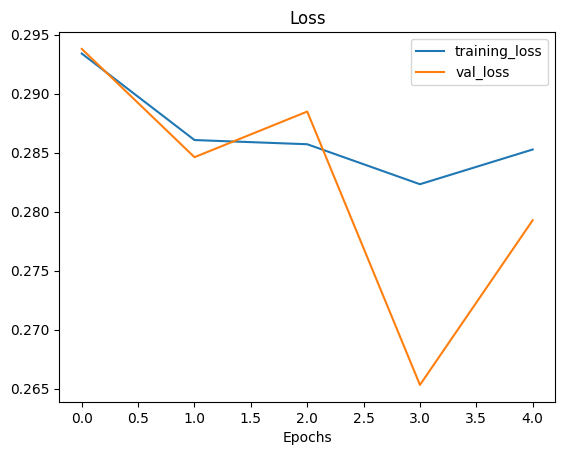

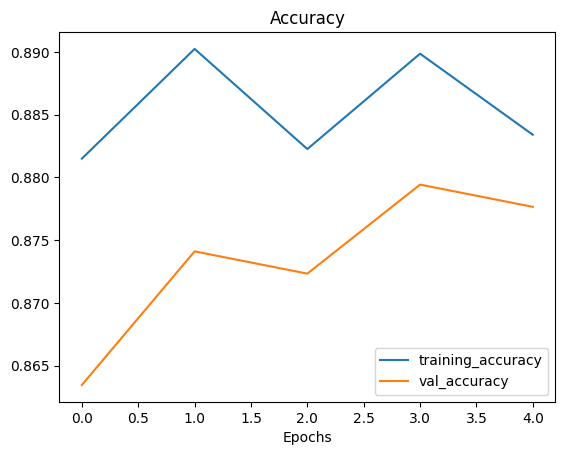

In [38]:
# Check out the loss curves of model_1
plot_loss_curves(history_1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step


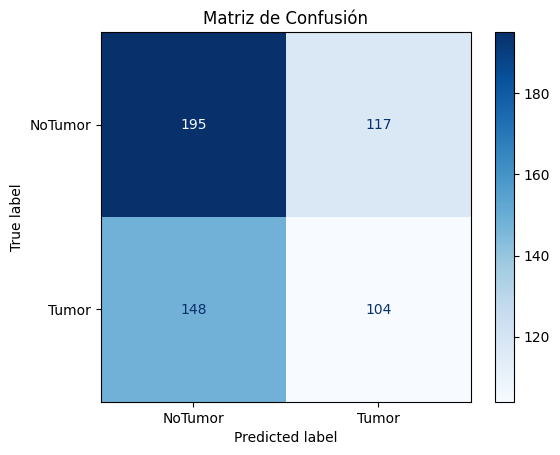

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones del modelo
y_pred = (classifier.predict(test_set) > 0.5).astype("int")  # Convertimos a 0 o 1
y_true = test_set.classes  # Las etiquetas verdaderas

# Generar matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NoTumor", "Tumor"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


Al ser entrenado con solo 5 epochs, entiendo el porqué encontramos fluctuaciones en la clasificación, sin embargo, considero que los valores de accuracy y loss son bastante buenos por lo que si lo seguimos entretando seguramente tendríamos resultados mejores. 

# Comparación con otros modelos

In [42]:
classifier.save("brain_tumor_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

 Reporte de clasificación para CNN:

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



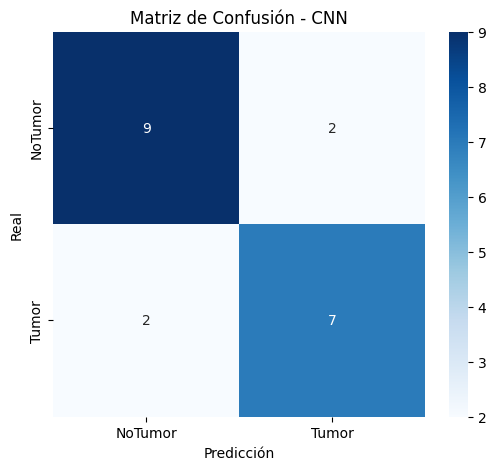


 Reporte de clasificación para SVM:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



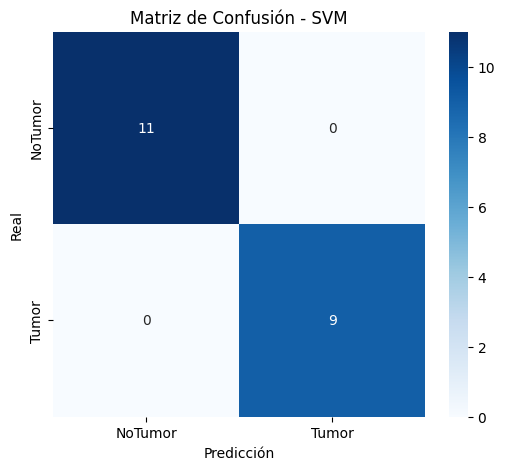


 Reporte de clasificación para Random Forest:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



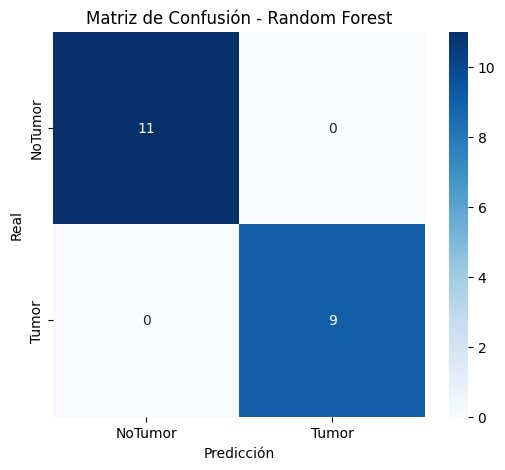


 Reporte de clasificación para MLP:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



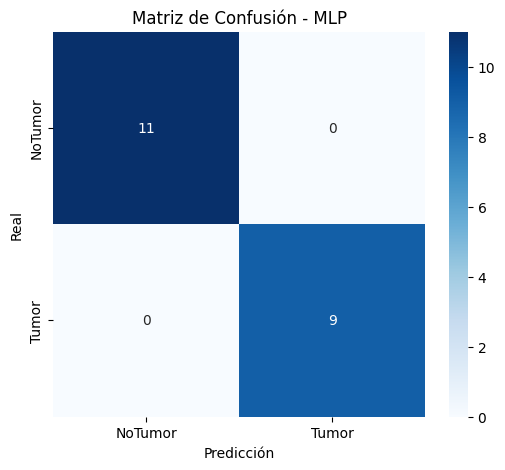

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import load_model

# Cargar datos de prueba
X_test, y_test = test_set[0]  # Usamos las imágenes y etiquetas del conjunto de prueba
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Aplanamos para modelos no-CNN

# Cargar el modelo CNN
cnn_model = load_model("brain_tumor_model.h5")
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int")  # Convertimos a binario

# Entrenar modelos supervisados
svm = SVC(kernel="linear").fit(X_test_flat, y_test)
rf = RandomForestClassifier(n_estimators=100).fit(X_test_flat, y_test)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32)).fit(X_test_flat, y_test)

# Generar predicciones
y_pred_svm = svm.predict(X_test_flat)
y_pred_rf = rf.predict(X_test_flat)
y_pred_mlp = mlp.predict(X_test_flat)

# Función para graficar matriz de confusión
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["NoTumor", "Tumor"], yticklabels=["NoTumor", "Tumor"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

# Comparación de modelos
models = {"CNN": y_pred_cnn, "SVM": y_pred_svm, "Random Forest": y_pred_rf, "MLP": y_pred_mlp}
for model_name, y_pred in models.items():
    print(f"\n Reporte de clasificación para {model_name}:\n")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, model_name)


Como conclusión, aunque la CNN tenga un menor accuracy que los demás modelos, considero que si hacemos más robusta la CNN o con más epochs puede que mejore su rendimiento y su clasificación sea mejor. Por otro lado, al parecer los otros modelos tienen un sobreajuste entonces puede que no sean tan buenos realmente para esta base de datos, decidí incluir el MLP (Multilayer Perceptron), un tipo de red neuronal artificial totalmente conectada (la vi por ahí y se me hizo interesante), y aunque se usa también para clasificar y modelos de regresión esta no está hecha realmente o no tiene la capacidad de aprender directamente sobre imágenes, aún así quise ver cómo funcionaba :)... pero bueno, esos son mis resultados. 